# Informe de investigación 4: Visualización de datos

### Presentado por: Scarlet Abreu y Renso Peralta

## 1. Riesgo de accidente cerebrovascular y habitos de vida

#### Importando librerias

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Leyendo csv

In [36]:
df=pd.read_csv('/home/renso/Downloads/healthcare-dataset-stroke-data.csv')

#### Seleccionando columnas

In [38]:
columnas = ['smoking_status', 'work_type', 'bmi']
column_select = df[columnas].copy()

#### Calculando la media

In [48]:
medias = column_select.groupby(['smoking_status', 'work_type'])['bmi'].mean().reset_index()
### la funcion groupby junta las columnas elegidas y hace combinaciones unicas. Luego la funcion mean saca el promedio
### de esas combinaciones y reset_index convierte el resultado en un DataFrame normal.
print(medias)

     smoking_status      work_type        bmi
0           Unknown       Govt_job  29.852586
1           Unknown   Never_worked  22.037500
2           Unknown        Private  29.886393
3           Unknown  Self-employed  29.545205
4           Unknown       children  19.700995
5   formerly smoked       Govt_job  31.315079
6   formerly smoked        Private  30.919721
7   formerly smoked  Self-employed  30.586294
8   formerly smoked       children  20.208333
9      never smoked       Govt_job  30.281455
10     never smoked   Never_worked  27.550000
11     never smoked        Private  30.171537
12     never smoked  Self-employed  30.197799
13     never smoked       children  23.655556
14           smokes       Govt_job  30.910619
15           smokes        Private  30.511024
16           smokes  Self-employed  30.457895
17           smokes       children  22.950000


#### Gráfico de barras (barplot) que muestra la media de la variable elegida por combinación de smoking_status y work_type.

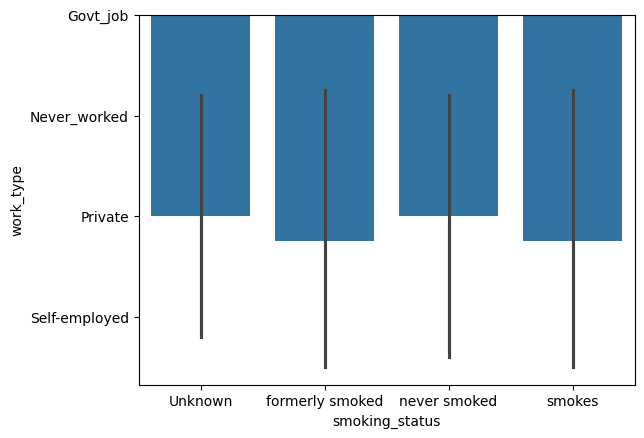

In [69]:
barra = sns.barplot(medias, x='smoking_status', y='work_type')
### La funcion barplot toma como parametros la variable elegida (los valores), un eje x, un eje y. En este caso, x es smoking_status,
### por otro lado, y es work_type.

#### Heatmap que muestra las medias, con smoking_status en un eje y work_type en el otro.

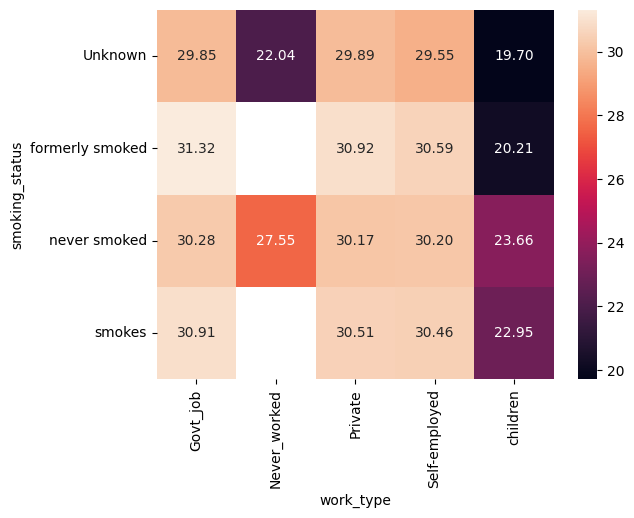

In [72]:
heat = medias.pivot(index="smoking_status", columns="work_type", values='bmi')
sns.heatmap(heat, annot=True, fmt='.2f')
plt.show()

### Se crea una variable llamada heat, la cual contiene el data frame medias junto con la funcion pivot. Esta funcion
### toma dos atributos, en este caso smoking_status, work_type y los convierte a un formato ancho. El parametro values toma la variable
### elegida, en este caso es bmi.

### la funcion heatmap, toma la variable heat, el parametro annot muestra los valores numéricos dentro de cada celda del heatmap y .fmt
### controla el formato de los números que se muestran cuando se usa annot=True.

### Comente cuál de los dos gráficos le resulta más claro para comparar los grupos y por qué, tomando en cuenta el público objetivo del análisis (por ejemplo, personal médico o de salud pública).

#### El grafico mas claro resulta ser el segundo (heatmap), ya que por la representacion de numeros, como se muestra cada eje con su respectivo valor y la barra de la derecha donde muestra que tono de color es correspondiente a cada valor del BMI, es mas facil de entender la informacion de manera rapida.

## 2. Intención de compra en comercio electrónico

#### Leyendo csv

In [5]:
df_ecommerce=pd.read_csv('/home/renso/Downloads/online_shoppers_intention.csv')

#### Variable numérica PageValues y boxplot que compara la misma entre las sesiones con Revenue = True y Revenue = False

In [11]:
figura = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

In [6]:
# Creando subconjunto donde Revenue es True (sesiones que terminaron en compra)
data_true = df_ecommerce[df_ecommerce['Revenue'] == True]['PageValues']
# Creando subconjunto donde Revenue es False (sesiones sin compra)
data_false = df_ecommerce[df_ecommerce['Revenue'] == False]['PageValues']

<function matplotlib.pyplot.show(close=None, block=None)>

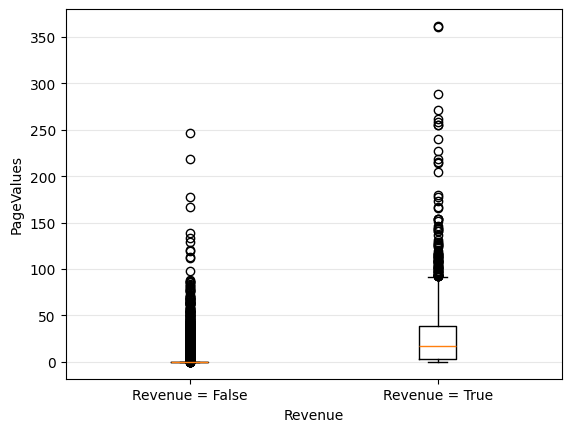

In [7]:
# boxplot() recibe una lista con ambos datasets para compararlos lado a lado
# tick_labels define las etiquetas en el eje X para identificar cada grupo
plt.boxplot([data_false, data_true], tick_labels=['Revenue = False', 'Revenue = True'])
# ylabel() establece la etiqueta del eje Y (variable numérica)
plt.ylabel('PageValues')
# xlabel() establece la etiqueta del eje X (variable categórica)
plt.xlabel('Revenue')
# grid() añade líneas de cuadrícula en el eje Y con transparencia del 30% (0.3) alpha, para facilitar la lectura
plt.grid(axis='y', alpha=0.3)
plt.show

#### Con la misma variable numérica (PageValues) y Revenue en el eje categórico violin plot

/tmp/ipykernel_5472/82200212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_ecommerce,x='Revenue',y='PageValues',palette=['blue','red'])


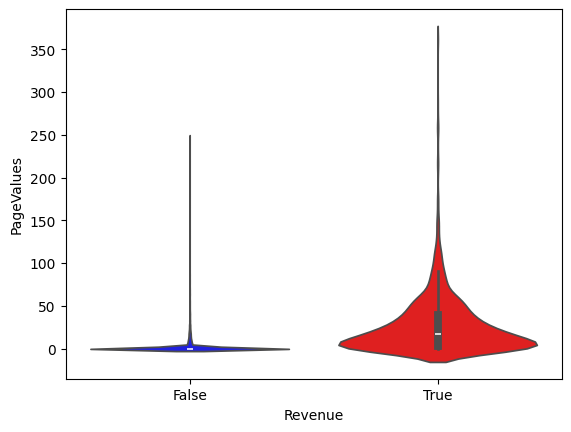

In [9]:
# La funcion violinplot crea un grafico de violin, esta recibe como parametros el dataframe de la fuente de
# datos, en este caso df_ecommerce. La variable categorica en este caso, x = Revenue (True, False) y la numerica
# PageValues. Palette es el color de ambas variables.
sns.violinplot(data=df_ecommerce,x='Revenue',y='PageValues',palette=['blue','red'])
plt.xlabel('Revenue')
plt.ylabel('PageValues')
plt.show()

#### Explique qué aporta cada tipo de gráfico para entender el comportamiento de la variable numérica con respecto a si el usuario termina o no en compra. Discuta qué tipo de usuario luce más “valioso” según la distribución observada

En el caso del grafico de boxplot, si el revenue true esta mas arriba que el de false, lo cual es asi, quiere decir que los usuarios que compran tienen PageValues mas altos. Esto dice que los PageValues podrian ser un buen predictor de compra. A simple vista no es tan sencillo de ver, por ende, no es tan eficiente como otros graficos.

Por otro lado, en el caso del grafico de violinplot, el revenue true tiene un violin ancho en valores bajos, esto quiere decir que la mayoria de los usuarios sin compra tienen PageValues bajos. Este grafico es mas legible de manera mas facil.


# 3. Felicidad, economía y bienestar en países del mundo

In [1]:
# Descargar kagglehub para poder utilizar el api
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sazidthe1/global-happiness-scores-and-factors")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Scarlet\.cache\kagglehub\datasets\sazidthe1\global-happiness-scores-and-factors\versions\1


In [3]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Cargar el dataset descargado desde kaggle
file = path + "/WHR_2023.csv"
df = pd.read_csv(file)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


#### Tarea 1: Filtre el dataset para quedarse solo con el año más reciente disponible (por ejemplo, 2023 si está en los datos). 

Se tomó el dataset con los datos más actuales, en este caso del año 2023

#### Tarea 2: Identifique las columnas que representen  

- Puntuación de felicidad (Happiness / Ladder score)
- Riqueza o desarrollo económico (Log GDP per capita o similar)
- Salud o bienestar físico (Healthy life expectancy o variable equivalente)

In [5]:
# Selección de las columnas claves
y_col = "happiness_score"
x_col = "gdp_per_capita"
health_col = "healthy_life_expectancy"

#### Tarea 3: Realice un scatter plot (gráfico de dispersión) usando como eje X la medida económica (por ejemplo, Log GDP per capita) y como eje Y la puntuación de felicidad. 

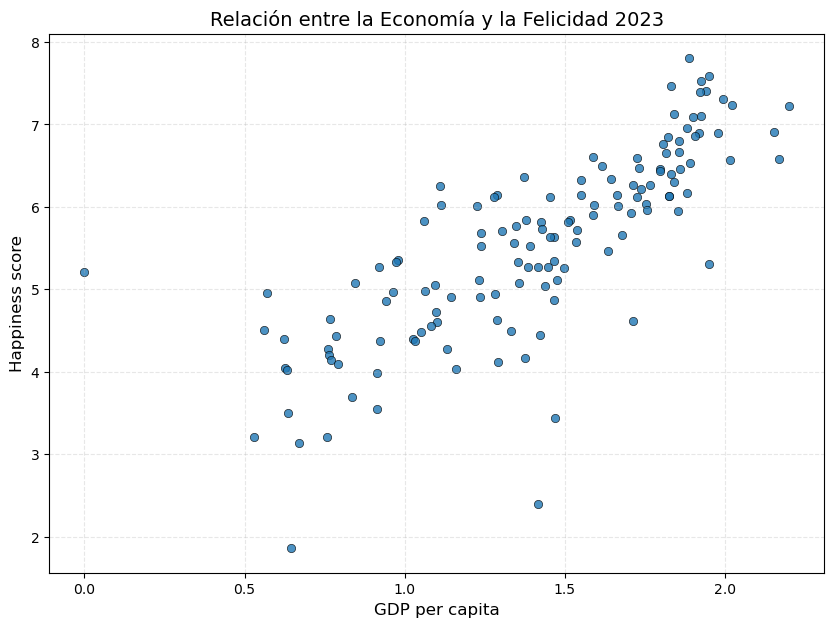

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(
    df[x_col],
    df[y_col],
    alpha=0.8,
    color="#1f77b4",   
    edgecolors="black",
    linewidth=0.5
)

# Etiquetas
plt.xlabel("GDP per capita", fontsize=12)
plt.ylabel("Happiness score", fontsize=12)
plt.title("Relación entre la Economía y la Felicidad 2023", fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.show()


#### Tarea 4: Realice un gráfico de burbujas (bubble chart) usando: 
- Eje X: variable económica (p.ej. Log GDP per capita),
- Eje Y: puntuación de felicidad,
- Tamaño (y opcionalmente color) de la burbuja: variable de salud (Healthy life expectancy u otra relacionada con salud). 

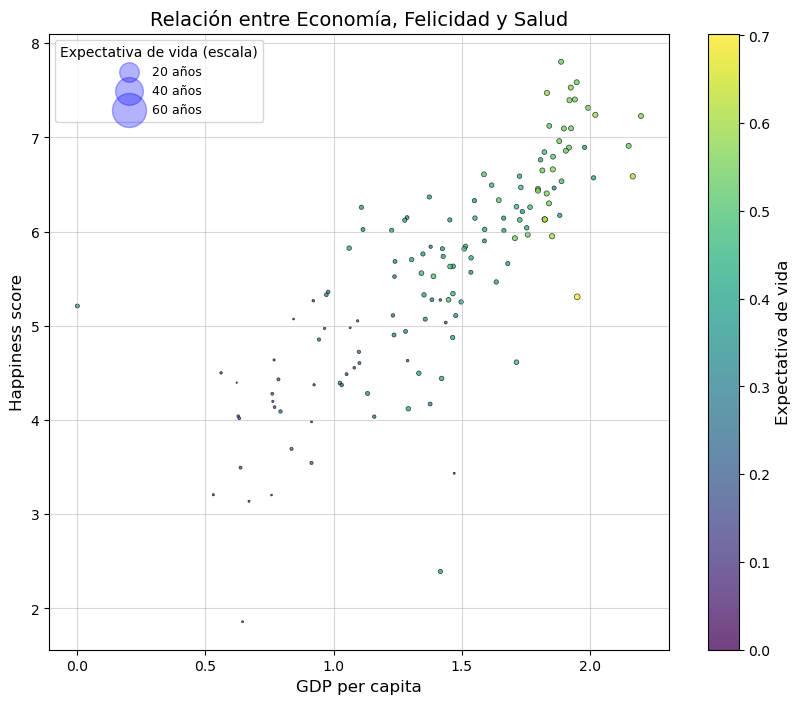

In [25]:
plt.figure(figsize=(10,8))

# Escalar tamaños para que no queden ni muy grandes ni muy pequeños
sizes = df[health_col] * 25  
scatter = plt.scatter(
    df[x_col],
    df[y_col],
    s=sizes,
    c=df[health_col],         
    cmap='viridis',          
    alpha=0.75,
    edgecolors='black',
    linewidth=0.5
)

# Etiquetas de ejes con títulos bonitos
plt.xlabel("GDP per capita", fontsize=12)
plt.ylabel("Happiness score", fontsize=12)
plt.title("Relación entre Economía, Felicidad y Salud", fontsize=14)

# Cuadrícula suave
plt.grid(alpha=0.5)

# Barra de color (leyenda para la salud)
cbar = plt.colorbar(scatter)
cbar.set_label("Expectativa de vida", fontsize=12)

# Crear una leyenda de tamaños manual para interpretar las burbujas
for val in [20, 40, 60]:
    plt.scatter([], [], s=val*10, c='blue', alpha=0.3, label=f"{val} años")

plt.legend(title="Expectativa de vida (escala)", loc="upper left", fontsize=9)

plt.show()


#### Discusión

Los gráficos confirman una fuerte correlación positiva entre la economía (gdp_per_capita) y la felicidad (happiness_score), los países con mejor economía tienden a reportar puntuaciones de bienestar significativamente más altas. De igual manera, esta tendencia se ve reforzada por la inclusión de la salud (healthy_life_expectancy), ya que una mayor esperanza de vida y bienestar físico generalmente acompañan a los países más ricos. 

No obstante, los gráficos también muestran que la economía no es el único factor determinante. La dispersión de los puntos en el eje de felicidad para niveles de economía similares indica que existes otros factores que tienen un peso crucial.

# 4. Propiedades físico-químicas y calidad del vino

### Leyendo csv

In [12]:
df_wine=pd.read_csv('/home/renso/Downloads/WineQT.csv')

In [13]:
# Variables elegidas
variables=['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

In [14]:
# Creando nuevo DataFrame con solo las columnas especificadas en 'variables'
df_vinos=df_wine[variables]
print(df_vinos)

      fixed acidity  volatile acidity  residual sugar    pH  alcohol  quality
0               7.4             0.700             1.9  3.51      9.4        5
1               7.8             0.880             2.6  3.20      9.8        5
2               7.8             0.760             2.3  3.26      9.8        5
3              11.2             0.280             1.9  3.16      9.8        6
4               7.4             0.700             1.9  3.51      9.4        5
...             ...               ...             ...   ...      ...      ...
1138            6.3             0.510             2.3  3.42     11.0        6
1139            6.8             0.620             1.9  3.42      9.5        6
1140            6.2             0.600             2.0  3.45     10.5        5
1141            5.9             0.550             2.2  3.52     11.2        6
1142            5.9             0.645             2.0  3.57     10.2        5

[1143 rows x 6 columns]


In [16]:
# Calculando correlaciones entre todas las variables numéricas
# Calculando coeficiente de correlación entre cada par de variables
matriz = df_vinos.corr()
print(matriz)

                  fixed acidity  volatile acidity  residual sugar        pH  \
fixed acidity          1.000000         -0.250728        0.171831 -0.685163   
volatile acidity      -0.250728          1.000000       -0.005751  0.221492   
residual sugar         0.171831         -0.005751        1.000000 -0.116959   
pH                    -0.685163          0.221492       -0.116959  1.000000   
alcohol               -0.075055         -0.203909        0.058421  0.225322   
quality                0.121970         -0.407394        0.022002 -0.052453   

                   alcohol   quality  
fixed acidity    -0.075055  0.121970  
volatile acidity -0.203909 -0.407394  
residual sugar    0.058421  0.022002  
pH                0.225322 -0.052453  
alcohol           1.000000  0.484866  
quality           0.484866  1.000000  


In [25]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

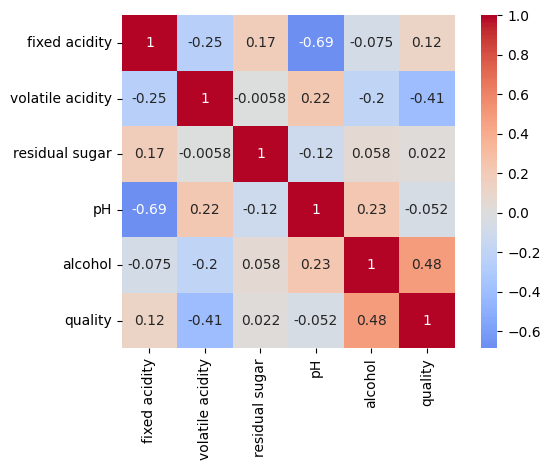

In [17]:
# sns.heatmap crea un mapa de calor de la matriz de correlación
sns.heatmap(matriz,annot=True,cmap='coolwarm',center=0,square=True)
# heatmap toma como parametros la matriz, que se calculo anteriormente, annot=True muestra los valores numericos en cada celda.
# Con cmap se coloca la escala de colores, y el center = 0 centra la escala de colores a 0. Por ultimo, square=True hace las celdas
# cuadradas para mejorar la visualizacion.
plt.tight_layout()
plt.show()

### Comente al menos dos relaciones interesantes (positivas o negativas) entre las propiedades químicas del vino y su calidad. Indique qué variables parecen más influyentes en una mejor calidad según las correlaciones observadas

In [18]:
# Se toma la columna 'quality' de la matriz de correlación
# la funcon sort_values(ascending=False) ordena de mayor a menor correlación.
correlaciones_quality = matriz['quality'].sort_values(ascending=False)
print(correlaciones_quality)

quality             1.000000
alcohol             0.484866
fixed acidity       0.121970
residual sugar      0.022002
pH                 -0.052453
volatile acidity   -0.407394
Name: quality, dtype: float64


#### ALCOHOL - Correlación positiva moderada (r = 0.485)
#### El contenido de alcohol es la variable con mayor correlación positiva con la calidad del vino. Existe una relación moderada donde a mayor graduación alcohólica, mayor tiende a ser la calidad percibida.

####  VOLATILE ACIDITY - Correlación negativa moderada (r = -0.407)
#### La acidez volátil muestra la correlación negativa más fuerte con la calidad, siendo la variable más influyente de forma negativa. A mayor acidez volátil, menor es la calidad del vino.

#### Positivamente (mejoran la calidad):

#### Alcohol (r = 0.485) - Influencia moderada positiva

#### Mayor contenido alcohólico → Mayor calidad


#### Fixed Acidity (r = 0.122) - Influencia débil positiva

#### Niveles adecuados de acidez fija → Ligera mejora en calidad


#### Residual Sugar (r = 0.022) - Influencia despreciable

#### Prácticamente sin efecto directo

## 5. Caídas de meteoritos en el mundo 

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nasa/meteorite-landings")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Scarlet\.cache\kagglehub\datasets\nasa\meteorite-landings\versions\2


In [46]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [33]:
# Cargar el dataset descargado desde kaggle
file = path + "/meteorite-landings.csv"
df = pd.read_csv(file)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


#### Tarea 1: Convierta la columna de año (year) a un tipo de dato de fecha (si es necesario) y filtre los datos para visualizar solo los meteoritos con año ≥ 2000. 

In [34]:
df['year'].head(20)

0     1880.0
1     1951.0
2     1952.0
3     1976.0
4     1902.0
5     1919.0
6     1949.0
7     1814.0
8     1930.0
9     1920.0
10    1974.0
11    1925.0
12    1769.0
13    1949.0
14    1838.0
15    1959.0
16    1981.0
17    1957.0
18    2001.0
19    1806.0
Name: year, dtype: float64

In [35]:
# Convertir de float a entero
df['year_int'] = df['year'].astype('Int64')

# Filtrar los mayores o iguales a 2000
df_filtered = df[df['year_int'] >= 2000]

df_filtered['year_int']

18       2001
22       2002
30       2008
49       2009
82       2006
         ... 
45687    2011
45688    2011
45689    2011
45702    2002
45714    2003
Name: year_int, Length: 19722, dtype: Int64

In [46]:
# Ver la cantidad de meteoritos que cayeron por año
df_filtered['year_int'].value_counts().sort_index()

year_int
2000    1792
2001    1650
2002    2078
2003    3323
2004    1940
2005     875
2006    2456
2007    1189
2008     957
2009    1497
2010    1005
2011     713
2012     234
2013      11
2101       1
2501       1
Name: count, dtype: Int64

In [36]:
# Limpiar para que solo sean 2000 al 2025
df_clean = df[(df['year_int'] >= 2000) & (df['year_int'] <= 2025)].copy()

# Ver la cantidad de meteoritos que cayeron por año
year_counts = df_clean['year_int'].value_counts().sort_index()

print(year_counts)

year_int
2000    1792
2001    1650
2002    2078
2003    3323
2004    1940
2005     875
2006    2456
2007    1189
2008     957
2009    1497
2010    1005
2011     713
2012     234
2013      11
Name: count, dtype: Int64


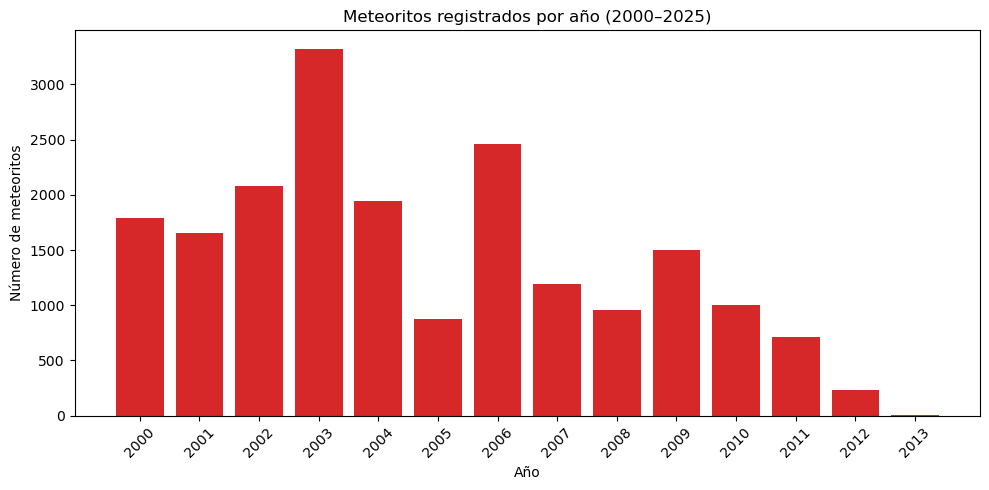

In [37]:
# Gráfico para visualizar los meteoritos que cayeron después del año 2000
plt.figure(figsize=(10,5))
plt.bar(year_counts.index.astype(int), year_counts.values, color='#d62828')
plt.xlabel("Año")
plt.ylabel("Número de meteoritos")
plt.title("Meteoritos registrados por año (2000–2025)")
plt.xticks(year_counts.index.astype(int), rotation=45)
plt.tight_layout()
plt.show()

### Tarea 2: Usando las columnas reclat y reclong, elabore un mapa en el que se ubiquen estos meteoritos sobre el mapa del mundo. Puede usar, por ejemplo, la librería geopandas en combinación con matplotlib. 

In [61]:
# Instalar geodatasets para el mapa del mundo
!pip install geodatasets


   ---------------------------------------- 0/2 [pooch]
   ---------------------------------------- 2/2 [geodatasets]



<Figure size 1400x1400 with 0 Axes>

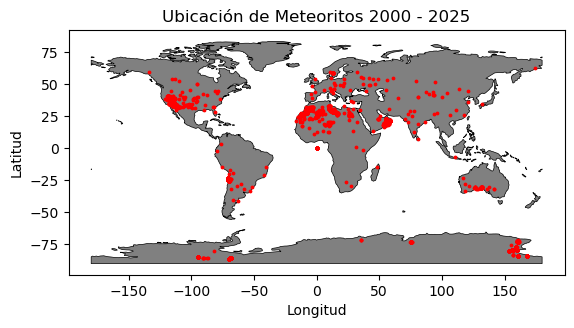

In [49]:
# Importar la libería para poder usar el mapa
import geodatasets

# Filtrar solo coordenadas reales de la Tierra
df_clean = df_clean[
    (df_clean['reclat'].between(-90, 90)) &
    (df_clean['reclong'].between(-180, 180))
].copy()

# Filtrar para eliminar valores nulos
df_clean = df_clean.dropna(subset=['reclat', 'reclong']).copy()

# Crear GeoDataFrame
geometry = gpd.points_from_xy(df_clean['reclong'], df_clean['reclat'])
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry, crs="EPSG:4326")

# Cargar mapa del mundo desde geodatasets
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Graficar
plt.figure(figsize=(14, 14))
ax = world.plot(color='gray', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, markersize=3, color='red')
plt.title("Ubicación de Meteoritos 2000 - 2025")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

#### Tarea 3: (Opcional pero recomendado) Haga que el tamaño o el color de los puntos represente la masa del meteorito (mass (g)), para resaltar los impactos más grandes

<Figure size 1400x1400 with 0 Axes>

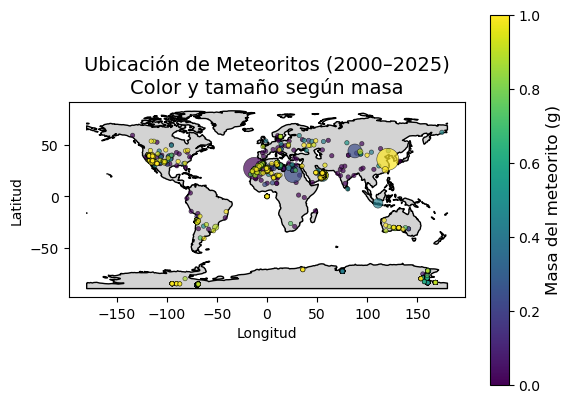

In [48]:
# Filtrar datos válidos
df_clean = df_clean.dropna(subset=['reclat', 'reclong', 'mass']).copy()

# Crear GeoDataFrame
geometry = gpd.points_from_xy(df_clean['reclong'], df_clean['reclat'])
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry, crs="EPSG:4326")

# Cargar mapa del mundo
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Tamaño proporcional a la masa
sizes = (gdf['mass'] / gdf['mass'].max()) * 300
sizes = sizes.clip(10, 250)   # Tamaños mínimos y máximos

plt.figure(figsize=(14, 14))

# Dibujar mapa base
ax = world.plot(color="lightgray", edgecolor="black")

# Scatter de meteoritos
scatter = gdf.plot(
    ax=ax,
    markersize=sizes,
    c=gdf['mass'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.4,
)

plt.title("Ubicación de Meteoritos (2000–2025)\nColor y tamaño según masa", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")

#  Barra de color (Masa real)
cbar = plt.colorbar(scatter.collections[0], ax=ax)
cbar.set_label("Masa del meteorito (g)", fontsize=12)

# Tomar valores de referencia (percentiles)
ref_vals = [
    gdf['mass'].quantile(0.25),
    gdf['mass'].quantile(0.50),
    gdf['mass'].quantile(0.90)
]

# Convertir esos valores a tamaños reales
ref_sizes = (np.array(ref_vals) / gdf['mass'].max()) * 300
ref_sizes = ref_sizes.clip(10, 250)
plt.show()

#### Reflexión

Los gráficos de las ubicaciones de caídas de meteoritos entre el 2000 y el 2025 muestra una alta concentración en Norteamérica, Europa y Asia, así como en la Antártida. Este patrón geográfico no refleja una mayor tasa de caída de meteoros en dichas zonas, sino más bien un sesgo de registro, la alta densidad en áreas pobladas se debe a la facilidad para descubrir y reportar hallazgos, mientras que la concentración en la Antártida es el resultado de programas de búsqueda sistemática que aprovechan las condiciones de preservación del hielo. Las burbujas de mayor tamaño, que son la que indican mayor masa, se encuentran más dispersas, incluyendo desiertos en África y Asia, donde la preservación es muy buena, confirmando que el mapa es más un indicador de la actividad humana de recuperación que la distribución de impactos de meteoros